In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
import os

In [2]:
# DATA

# import

file_path = os.path.join('test_weather_data.csv')
data = pd.read_csv(file_path)

data.head()


,index,time,airT,rainIntensity,rH,solarRadiance,windDir,windSpeed,pressure
0,1133,2020-11-05 12:15:00+00:00,10.9,0.0,76.4,111.4,233.0,1.13,99010.0
1,1134,2020-11-05 12:20:00+00:00,10.9,0.0,76.7,115.5,245.0,1.17,99010.0
2,1135,2020-11-05 12:25:00+00:00,11.0,0.0,75.5,117.2,243.0,1.64,99010.0
3,1136,2020-11-05 12:30:00+00:00,11.0,0.0,76.0,118.8,226.0,1.54,99000.0
4,1137,2020-11-05 12:35:00+00:00,11.0,0.0,74.2,120.4,221.0,1.90,99000.0


In [3]:
# Rename columns to match the old format
new_data = data.rename(columns={
    'time': 'acquisition_timestamp',
    'airT': 'AMBIENT_TEMPERATURE',
    'rainIntensity': 'RAIN_INTENSITY',
    'rH': 'RELATIVE_HUMIDITY',
    'solarRadiance': 'SOLAR_RADIATION_INTENSITY',
    'windDir': 'WIND_DIRECTION',
    'windSpeed': 'WIND_SPEED',
    'pressure': 'AIR_PRESSURE'
})

# Convert acquisition_timestamp to datetime
new_data['acquisition_timestamp'] = pd.to_datetime(new_data['acquisition_timestamp'], utc=True)


# Drop the 'index' column
new_data = new_data.drop(columns=['index'])

# Set the 'acquisition_timestamp' as the index
new_data = new_data.set_index('acquisition_timestamp')

# Rearrange columns to match the old format
new_data = new_data[[
    'AIR_PRESSURE', 'AMBIENT_TEMPERATURE', 'RAIN_INTENSITY', 
    'RELATIVE_HUMIDITY', 'SOLAR_RADIATION_INTENSITY', 
    'WIND_DIRECTION', 'WIND_SPEED'
]]

# Display the reformatted DataFrame
new_data.head()


,AIR_PRESSURE,AMBIENT_TEMPERATURE,RAIN_INTENSITY,RELATIVE_HUMIDITY,SOLAR_RADIATION_INTENSITY,WIND_DIRECTION,WIND_SPEED
acquisition_timestamp,,,,,,,
2020-11-05 12:15:00+00:00,99010.0,10.9,0.0,76.4,111.4,233.0,1.13
2020-11-05 12:20:00+00:00,99010.0,10.9,0.0,76.7,115.5,245.0,1.17
2020-11-05 12:25:00+00:00,99010.0,11.0,0.0,75.5,117.2,243.0,1.64
2020-11-05 12:30:00+00:00,99000.0,11.0,0.0,76.0,118.8,226.0,1.54
2020-11-05 12:35:00+00:00,99000.0,11.0,0.0,74.2,120.4,221.0,1.90


In [4]:



# relative humidity
humidity = new_data[['RELATIVE_HUMIDITY']]
print(humidity)

# count the NaN values
nan_count_humidity = humidity['RELATIVE_HUMIDITY'].isna().sum()
print(f'Nan Count Temperature :',nan_count_humidity)
# there are no NaN values

# check for missing measurements (skipped times)
complete_range = pd.date_range(start=humidity.index.min(), end=humidity.index.max(), freq='5T')
missing_timestamps = complete_range.difference(humidity.index)
print(f'Length of missing timestamps :',len(missing_timestamps))
#print(complete_range)
df_complete_range = pd.DataFrame(index=complete_range)
print(f'Data Complete Range :',len(df_complete_range))
# we have 271508 measurements, there are 5112 missing measurment out of 276620 time steps in the whole time range

# merge all the air pressure measurements with all the time steps. missing measurment will be NaN values for now
humidity_incomplete = df_complete_range.merge(humidity, left_index=True, right_index=True, how='left')
# print(humidity_incomplete)
humidity_incomplete.isna().sum() # okay

# missing measurements are filled with the next available measurement
humidity_all = humidity_incomplete.bfill()
print(f'Temperature all :',humidity_all)
print(f'Sum of na Tempertaure all :',humidity_all.isna().sum()) # okay

str(humidity_all.index.dtype) # okay

                           RELATIVE_HUMIDITY
acquisition_timestamp                       
2020-11-05 12:15:00+00:00               76.4
2020-11-05 12:20:00+00:00               76.7
2020-11-05 12:25:00+00:00               75.5
2020-11-05 12:30:00+00:00               76.0
2020-11-05 12:35:00+00:00               74.2
...                                      ...
2023-05-31 21:35:00+00:00               85.6
2023-05-31 21:40:00+00:00               84.9
2023-05-31 21:45:00+00:00               85.3
2023-05-31 21:50:00+00:00               85.9
2023-05-31 21:55:00+00:00               85.2

[265803 rows x 1 columns]
Nan Count Temperature : 6
Length of missing timestamps : 4170
Data Complete Range : 269973
Temperature all :                            RELATIVE_HUMIDITY
2020-11-05 12:15:00+00:00               76.4
2020-11-05 12:20:00+00:00               76.7
2020-11-05 12:25:00+00:00               75.5
2020-11-05 12:30:00+00:00               76.0
2020-11-05 12:35:00+00:00               74.2
...      

'datetime64[ns, UTC]'

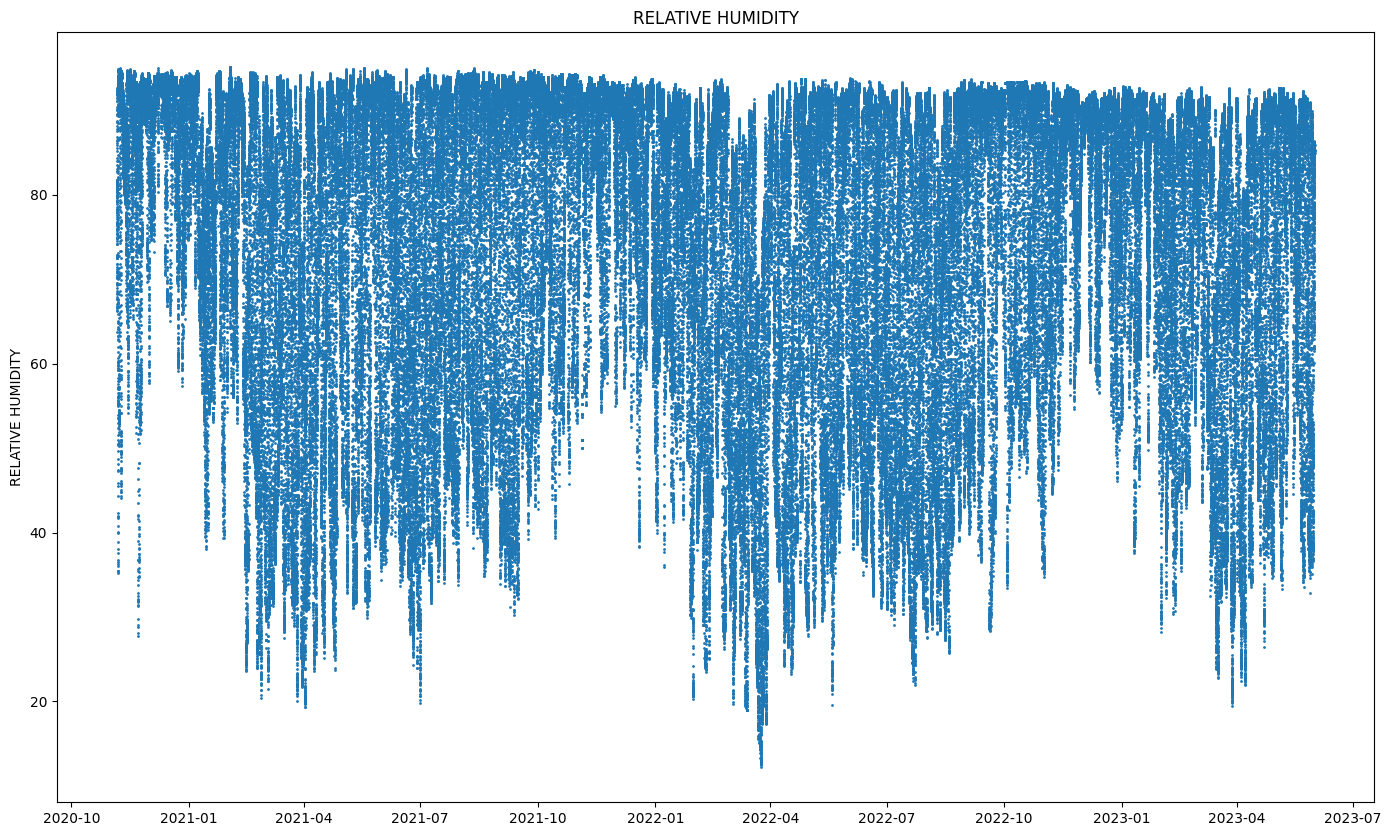

In [5]:
# plot 'AMMBIENT_TEMPERATURE'
fig, ax = plt.subplots(figsize=(17, 10))
ax.scatter(humidity_all.index, humidity_all['RELATIVE_HUMIDITY'],s=1)
ax.set_ylabel('RELATIVE HUMIDITY')  
ax.set_title('RELATIVE HUMIDITY')  
plt.show()

                           RELATIVE_HUMIDITY
2020-11-05 12:00:00+00:00          75.266667
2020-11-05 13:00:00+00:00          71.108333
2020-11-05 14:00:00+00:00          68.725000
2020-11-05 15:00:00+00:00          72.100000
2020-11-05 16:00:00+00:00          79.641667
...                                      ...
2023-05-31 17:00:00+00:00          81.625000
2023-05-31 18:00:00+00:00          83.583333
2023-05-31 19:00:00+00:00          84.825000
2023-05-31 20:00:00+00:00          85.691667
2023-05-31 21:00:00+00:00          85.683333

[22498 rows x 1 columns]


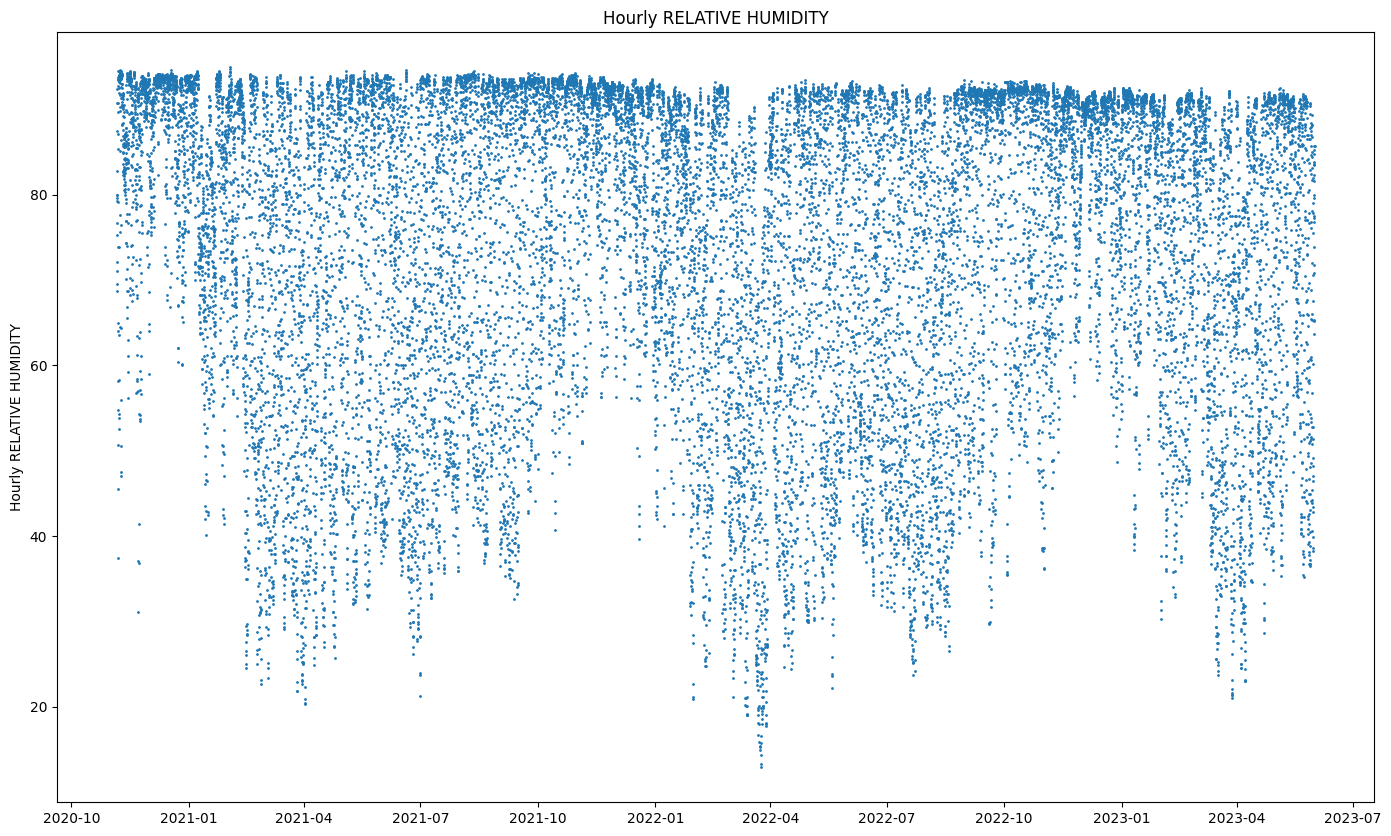

In [6]:
# hourly data
# sum the values for each hour and take the mean

str(humidity_all.index.dtype) # okay
humidity_hourly = humidity_all.resample('H').mean()
print(humidity_hourly)

# plot hourly 'AMBIENT_TEMPERATURE'
fig, ax = plt.subplots(figsize=(17, 10))
ax.scatter(humidity_hourly.index, humidity_hourly['RELATIVE_HUMIDITY'],s=1)
ax.set_ylabel('Hourly RELATIVE HUMIDITY')  
ax.set_title('Hourly RELATIVE HUMIDITY')  
plt.show()

In [7]:
# fit the old models to the new data 


from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Define both fits
order_1=(2,1,1)
order_2=(3,0,4)


                               SARIMAX Results                                
Dep. Variable:      RELATIVE_HUMIDITY   No. Observations:                22498
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -65428.485
Date:                Mon, 20 May 2024   AIC                         130864.969
Time:                        14:55:00   BIC                         130897.054
Sample:                    11-05-2020   HQIC                        130875.407
                         - 05-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1119      0.050      2.244      0.025       0.014       0.210
ar.L2          0.2108      0.032      6.587      0.000       0.148       0.273
ma.L1          0.5151      0.050     10.404      0.0

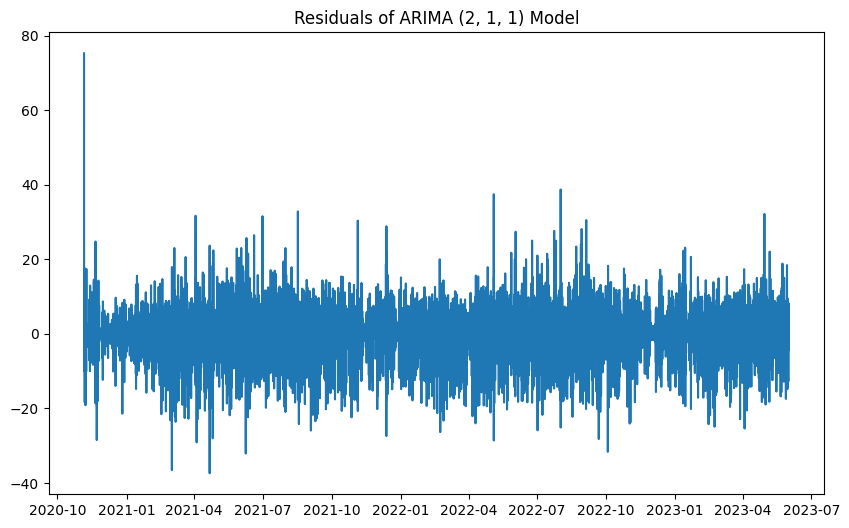

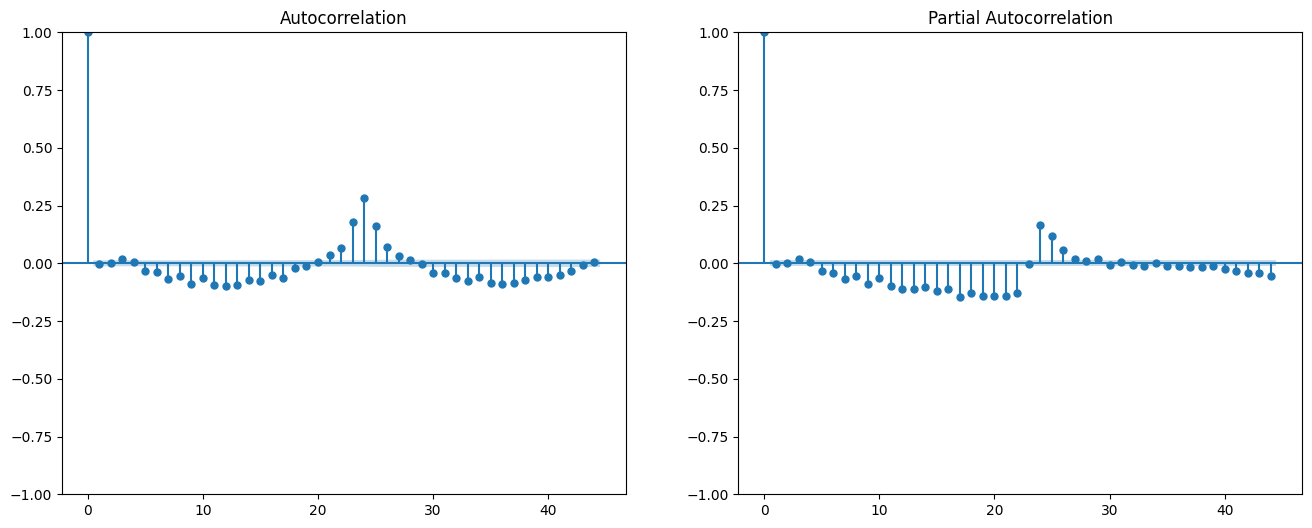

In [8]:

# fit the model number 1
best_model_1 = ARIMA(humidity_hourly, order=order_1)   # change order accordingly
best_fit_1 = best_model_1.fit()

# summary of the best model
print(best_fit_1.summary())

# residuals of the best model
residuals_best_1 = best_fit_1.resid

# plot residuals
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(residuals_best_1)
plt.title(f'Residuals of ARIMA {order_1} Model')
plt.show()

# plot ACF and PACF of the residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(residuals_best_1, ax=ax[0], alpha=0.05)
plot_pacf(residuals_best_1, ax=ax[1], alpha=0.05)
plt.show()

                               SARIMAX Results                                
Dep. Variable:      RELATIVE_HUMIDITY   No. Observations:                22498
Model:                 ARIMA(3, 0, 4)   Log Likelihood              -63276.600
Date:                Mon, 20 May 2024   AIC                         126571.199
Time:                        14:55:38   BIC                         126643.390
Sample:                    11-05-2020   HQIC                        126594.684
                         - 05-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.0868      0.563    131.501      0.000      72.983      75.191
ar.L1          2.8473      0.004    746.999      0.000       2.840       2.855
ar.L2         -2.7684      0.007   -377.233      0.0

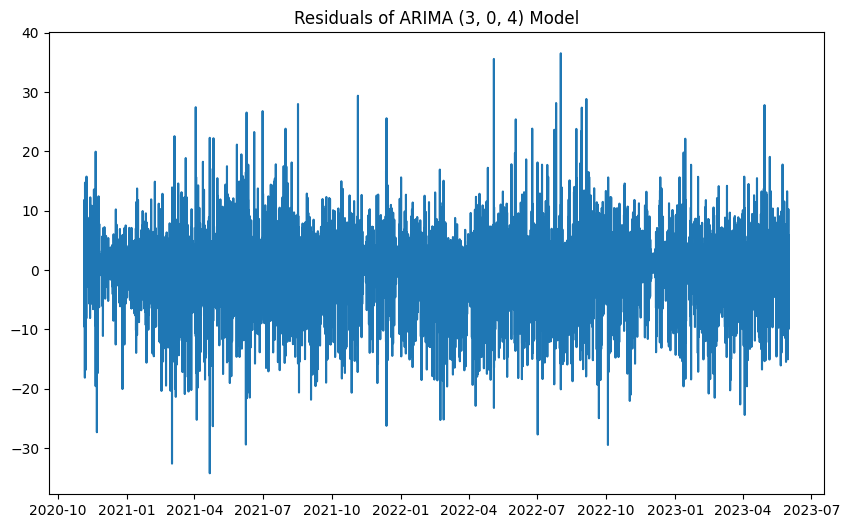

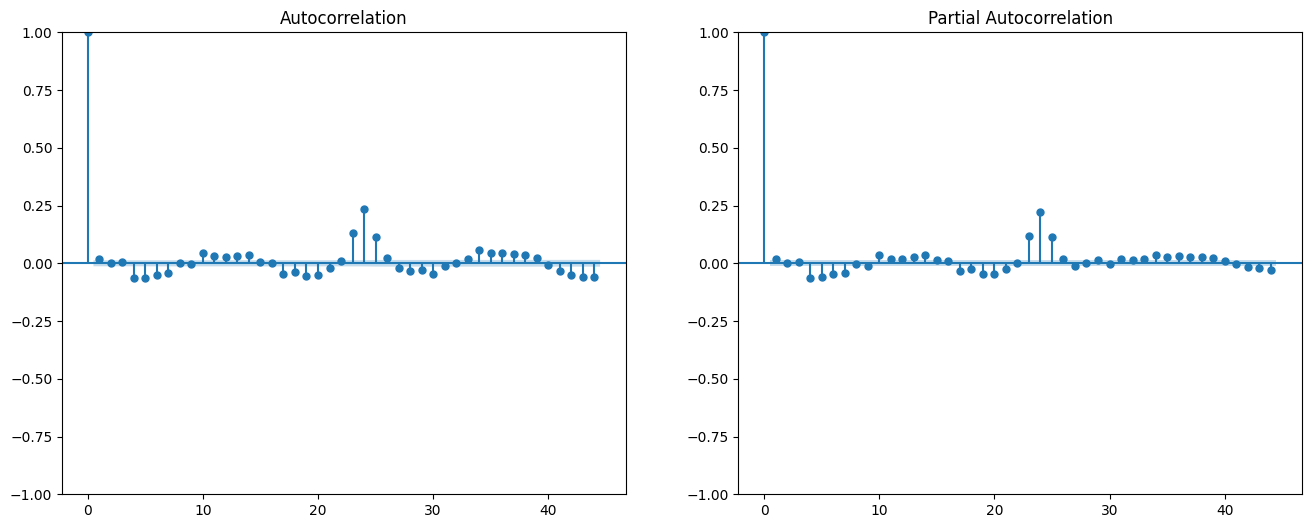

In [9]:
# fit the model number 2
best_model_2 = ARIMA(humidity_hourly, order=order_2)   # change order accordingly
best_fit_2 = best_model_2.fit()

# summary of the best model
print(best_fit_2.summary())

# residuals of the best model
residuals_best_2 = best_fit_2.resid

# plot residuals
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(residuals_best_2)
plt.title(f'Residuals of ARIMA {order_2} Model')
plt.show()

# plot ACF and PACF of the residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(residuals_best_2, ax=ax[0], alpha=0.05)
plot_pacf(residuals_best_2, ax=ax[1], alpha=0.05)
plt.show()